In [2]:
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt

In [4]:
#read the dataset
df= pd.read_csv("vtc_data.csv")
df.head()

,travel_id,travel_type,car_type,driver_id,address_of_departure,arrival_address,lat_and_long_of_arrival_address,date_of_travel,time_of_travel,estimated_time,distance,options,state,price
0,27550488,advance,Mini Citadine,NaN,"AXA Assurances Algérie, Boulevard du 11 Decemb...","Clinique Krim Belkacem, Boulevard Colonel Krim...","36.770681600000003,3.0510609999999998",2019-09-29 23:55:00,23:55:00,13,6053.0,NaN,cancelled,0.0
1,28026204,live,Mini Citadine,43166.0,Unnamed Road Dar El Beïda,"136 logements, bloc D، Route de Ouled Fayet Ch...","36.745614799999998,2.9428641",2019-09-29 23:54:36,23:54:00,33,31895.0,NaN,finished,133300.0
2,28026119,live,Mini Citadine,30759.0,"Office Riadh El Feth ,bois des arcades ,El Mad...","79 Rue Fabri MARCELLO, Bir Mourad Raïs, 阿尔及利亚","36.736257999999999,3.0616660000000002",2019-09-29 23:54:27,23:54:00,7,3056.0,NaN,finished,32600.0
3,28025871,live,Mini Citadine,32536.0,N24 Bordj El Kiffan,"Dar El Beïda, Algeria","36.727856899999999,3.2181302000000001",2019-09-29 23:47:25,23:47:00,7,6092.0,NaN,finished,38300.0
4,28026102,live,Mini Citadine,40592.0,"Lily Rose, Hydra, Algeria","214 résidence، Bois des Cars 2, Deli Ibrahim, ...","36.753667999999998,2.9762750000000002",2019-09-29 23:46:35,23:46:00,11,6928.0,NaN,finished,47800.0


In [7]:
#an overall view: number of non-null rows + type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65335 entries, 0 to 65334
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   travel_id                        65335 non-null  int64  
 1   travel_type                      65335 non-null  object 
 2   car_type                         65335 non-null  object 
 3   driver_id                        60229 non-null  float64
 4   address_of_departure             65335 non-null  object 
 5   arrival_address                  65292 non-null  object 
 6   lat_and_long_of_arrival_address  65292 non-null  object 
 7   date_of_travel                   65335 non-null  object 
 8   time_of_travel                   65121 non-null  object 
 9   estimated_time                   65335 non-null  int64  
 10  distance                         65078 non-null  float64
 11  options                          1152 non-null   object 
 12  state             

In [8]:
#infos about the interger values
df.describe()

,travel_id,driver_id,estimated_time,distance,price
count,6.533500e+04,60229.000000,65335.000000,65078.000000,6.512100e+04
mean,2.698962e+07,36458.806904,20.731981,12456.091091,4.291896e+04
std,5.911326e+05,5170.877670,21.092258,16331.355123,4.961151e+04
min,1.147333e+07,14770.000000,0.000000,0.000000,-6.800000e+04
25%,2.646277e+07,32376.000000,11.000000,4851.000000,0.000000e+00
50%,2.691974e+07,36638.000000,17.000000,8960.500000,3.820000e+04
75%,2.751333e+07,41457.000000,26.000000,16490.750000,6.080000e+04
max,2.805757e+07,44197.000000,618.000000,575798.000000,2.250000e+06


In [10]:
# time range of all travels 
print("first date:" , df["date_of_travel"].min())
print("last date:", df["date_of_travel"].max())

first date: 2019-08-26 18:35:57
last date: 2019-09-29 23:55:00


Features selection

In [12]:
selected_features=["travel_type", "car_type", "date_of_travel", "distance", "lat_and_long_of_arrival_address"]
target_name="estimated_time"
features=df[selected_features]
labels=df[target_name]

In [14]:
#extract hour and day name
features["date_of_travel"]=pd.DataFrame(pd.to_datetime(features.date_of_travel, format ="%Y-%m-%d %H:%M:%S"))
features["hour"]= features["date_of_travel"].dt.hour
features["day"]=features["date_of_travel"].dt.day_name()
features.drop(["date_of_travel"], axis=1, inplace=True)
features.head()

<ipython-input-14-227837576e19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["date_of_travel"]=pd.DataFrame(pd.to_datetime(features.date_of_travel, format ="%Y-%m-%d %H:%M:%S"))
<ipython-input-14-227837576e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["hour"]= features["date_of_travel"].dt.hour
<ipython-input-14-227837576e19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,travel_type,car_type,distance,lat_and_long_of_arrival_address,hour,day
0,advance,Mini Citadine,6053.0,"36.770681600000003,3.0510609999999998",23,Sunday
1,live,Mini Citadine,31895.0,"36.745614799999998,2.9428641",23,Sunday
2,live,Mini Citadine,3056.0,"36.736257999999999,3.0616660000000002",23,Sunday
3,live,Mini Citadine,6092.0,"36.727856899999999,3.2181302000000001",23,Sunday
4,live,Mini Citadine,6928.0,"36.753667999999998,2.9762750000000002",23,Sunday


In [17]:
# separate the lat anfd long
features[["lon", "lat"]]= features.lat_and_long_of_arrival_address.str.split(",",expand=True)
features["lon"]= pd.to_numeric(features["lon"], downcast="float")
features["lat"]= pd.to_numeric(features["lat"], downcast="float")
features.drop(["lat_and_long_of_arrival_address"], axis=1, inplace=True)
features.head()

<ipython-input-17-d157846da486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["lon"]= pd.to_numeric(features["lon"], downcast="float")
<ipython-input-17-d157846da486>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["lat"]= pd.to_numeric(features["lat"], downcast="float")
c:\program files\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,travel_type,car_type,distance,hour,day,lon,lat
0,advance,Mini Citadine,6053.0,23,Sunday,36.770683,3.051061
1,live,Mini Citadine,31895.0,23,Sunday,36.745613,2.942864
2,live,Mini Citadine,3056.0,23,Sunday,36.736259,3.061666
3,live,Mini Citadine,6092.0,23,Sunday,36.727856,3.218130
4,live,Mini Citadine,6928.0,23,Sunday,36.753670,2.976275


In [18]:
# chack if there are null values
for col in features.columns:
    print(col,':',features[col].isnull().sum())

travel_type : 0
car_type : 0
distance : 257
hour : 0
day : 0
lon : 43
lat : 43


In [20]:
#trait missing data ( rempalcer les na par le mean)
features["distance"].fillna(features["distance"].mean(), inplace=True)
features["lat"].fillna(features["lat"].mean(), inplace=True)
features["lon"].fillna(features["lon"].mean(), inplace=True)


In [22]:
features.isnull().sum()

travel_type    0
car_type       0
distance       0
hour           0
day            0
lon            0
lat            0
dtype: int64

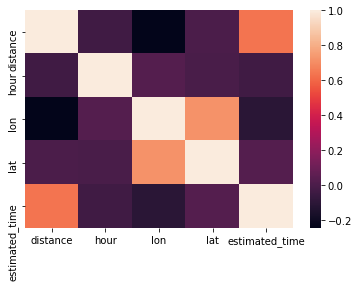

In [29]:
#Visualisation
import seaborn as sns
corr= pd.concat([features, labels], axis=1).corr()
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)